In [24]:
from calitp.tables import tbl
from calitp import query_sql
from siuba import *

import datetime as dt
SELECTED_DATE = dt.date(2022, 2, 8)

table = query_sql(
    '''
    with lat_long as (
        SELECT 
            calitp_itp_id,
            calitp_url_number,
            calitp_extracted_at,
            shape_id,
            CAST(shape_pt_sequence AS INT64) as shape_pt_sequence,
            calitp_deleted_at,
        
        ST_GEOGPOINT(CAST(shape_pt_lon AS FLOAT64), CAST(shape_pt_lat AS FLOAT64)) as pt_geom
        FROM `cal-itp-data-infra.gtfs_schedule_type2.shapes`
        WHERE
            calitp_itp_id = 290 AND calitp_extracted_at <= '2022-02-08'
            AND calitp_deleted_at > '2022-02-08'
            AND shape_id = 'SamTrans80:3980273'
        LIMIT 10000
    )

    SELECT 
        calitp_itp_id,
        calitp_url_number,
        shape_id,
        calitp_extracted_at,
        ST_MAKELINE(ARRAY_AGG(pt_geom ORDER BY shape_pt_sequence)) as line_geom
    FROM lat_long
    GROUP BY 
        calitp_itp_id,
        calitp_url_number,
        calitp_extracted_at,
        shape_id
    '''
)

In [25]:
table

,calitp_itp_id,calitp_url_number,shape_id,calitp_extracted_at,line_geom
0,290,1,SamTrans80:3980273,2022-01-31,"MULTILINESTRING((-122.396782 37.795809, -122.3..."


In [26]:
type(table['line_geom'].iloc[0])

str

In [27]:
# table['line_geom'].iloc[0]

In [28]:
import shapely

In [31]:
geo = shapely.wkt.loads(table.line_geom.iloc[0])

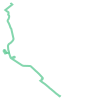

In [32]:
geo

In [35]:
len(geo.geoms)

3

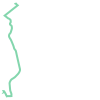

In [36]:
geo.geoms[0]

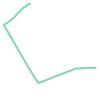

In [37]:
geo.geoms[1]

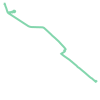

In [38]:
geo.geoms[2]